# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
from dotenv import load_dotenv

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"


In [5]:
url = "https://api.alternative.me/v2/ticker/"
response = requests.get(url)
data = response.json()

btc_price = data['data']['1']['quotes']['USD']['price']
eth_price = data['data']['1027']['quotes']['USD']['price']

my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $41500.80
The current value of your 5.3 ETH is $9599.25


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
import os
import pandas as pd
import alpaca_trade_api as tradeapi

# Ensure environment variables are set and loaded
from dotenv import load_dotenv
load_dotenv()

# Set up the Alpaca API
api_key = os.getenv("ALPACA_API_KEY")
ak = 'PKJ716EXNDV7NHUV5RFD'
secret_key = os.getenv("ALPACA_SECRET_KEY")
sk = 'UdYG7d1WdFjL6Cdxo8FyoGCpuU361lN1slwFYDI0'
base_url = "https://paper-api.alpaca.markets"
#api = tradeapi.REST(api_key, secret_key, base_url)
api = tradeapi.REST(ak, sk, base_url)

tickers = ["SPY", "AGG"]
timeframe = "1D"

today=pd.Timestamp("2022-05-22", tz="America/New_York").isoformat()


# # Use get_barset to fetch data
df_portfolio = api.get_bars(tickers, timeframe, start=today).df
#df_portfolio.head()

# # Access the closing price
spy_close_price = df_portfolio[df_portfolio['symbol']=="SPY"].drop('symbol', axis=1)  
agg_close_price = df_portfolio[df_portfolio['symbol']=="AGG"].drop('symbol', axis=1)  

# # # If you want to separate and then combine, you can, but it's redundant in this case
# df_spy = df_portfolio["SPY"].copy()
# df_agg = df_portfolio["AGG"].copy()
df_combined = pd.concat([spy_close_price, agg_close_price], axis=1, keys=['AGG','SPY'])


df_combined.head()


AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2022-05-23 04:00:00+00:00  396.92  397.7300  390.38      714915  392.83   
2022-05-24 04:00:00+00:00  393.89  395.1500  386.96      804229  392.56   
2022-05-25 04:00:00+00:00  397.37  399.4500  391.89      768577  392.31   
2022-05-26 04:00:00+00:00  405.31  407.0400  398.45      606439  398.67   
2022-05-27 04:00:00+00:00  415.26  415.3801  407.70      601624  407.91   

                                                    SPY                     \
                             volume        vwap   close     high       low   
timestamp                                                                    
2022-05-23 04:00:00+00:00  76648121  395.169792  102.82  103.200  102.7300   
2022-05-24 04:00:00+00:00  92541551  391.579387  103.61  103.740  103.1300   
2022-05-25 04:00:00+00:00  92887420  395.796462  104.04  104.070  103.7650   
2022-05-26 04:00:00+00:00  83804711  404.272675  103.96  104.190  103.8000   
2022-05-27 04:00:00+00:00  87207078  412.539489  104.13  104.305  104.0201   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2022-05-23 04:00:00+00:00       24537  103.01   8116013  102.943019  
2022-05-24 04:00:00+00:00       33635  103.14  10398251  103.560742  
2022-05-25 04:00:00+00:00       31994  103.93   8391494  103.922593  
2022-05-26 04:00:00+00:00       22134  104.07   5971549  103.957481  
2022-05-27 04:00:00+00:00       18226  104.09   5782850  104.138549

In [8]:
# Ensure that you have already set up the Alpaca API connection
# import alpaca_trade_api as tradeapi
# import pandas as pd

# # Your API keys setup
# ALPACA_API_KEY = os.getenv("ALPACA_API_KEY")
# ALPACA_SECRET_KEY = os.getenv("ALPACA_SECRET_KEY")
# BASE_URL = os.getenv("BASE_URL")

# # Create the Alpaca API object
# api = tradeapi.REST(ALPACA_API_KEY, ALPACA_SECRET_KEY, base_url=BASE_URL)

# # Define the tickers and the timeframe
# tickers = ["AGG", "SPY"]
# timeframe = "1D"

# # # Fetch the latest barset (prices) for these tickers
# barset = api.get_bars(tickers, timeframe, limit=1)

# # Extract the closing prices
agg_close_price = df_combined['AGG']['close'][0]  # .c stands for 'close'
spy_close_price = df_combined['SPY']['close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $396.92
Current SPY closing price: $102.82


In [ ]:
# Compute the current value of shares
# YOUR CODE HERE!

# barset = api.get_barset(tickers, timeframe, limit=1)

# # Extract the closing prices
# agg_close_price = barset['AGG'][0].c  # .c stands for 'close'
# spy_close_price = barset['SPY'][0].c

# # Print the close prices
# print(f"Current AGG closing price: ${agg_close_price}")
# print(f"Current SPY closing price: ${spy_close_price}")

# # Print current value of shares
# print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
# print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

AttributeError: 'REST' object has no attribute 'get_barset'

### Savings Health Analysis

In [9]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_value = my_btc_value + my_eth_value
shares_value = spy_close_price + agg_close_price

# Create savings DataFrame
data = {'Amount': [crypto_value, shares_value]}
df_savings = pd.DataFrame(data, index=['Crypto', 'Shares'])

# Display savings DataFrame
display(df_savings)



,Amount
Crypto,51100.054
Shares,499.740


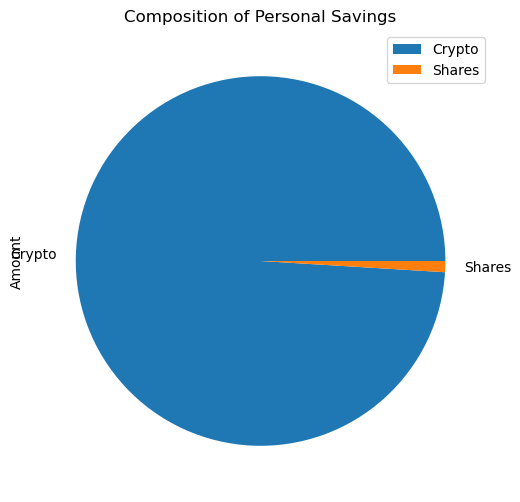

In [10]:
import matplotlib.pyplot as plt
df_savings.plot(kind='pie', y='Amount', title="Composition of Personal Savings", figsize=(10,6));


In [11]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
savings = float(df_savings.sum())
# Validate saving health
# YOUR CODE HERE!
if savings > emergency_fund:
    print('healthy')
elif savings < emergency_fund:
    print('uh-oh')
else:
    print('equal')

healthy


C:\Users\erino\AppData\Local\Temp\ipykernel_48924\3828204699.py:6: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  savings = float(df_savings.sum())


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [12]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [13]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = api.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

spy_close_price = df_portfolio[df_portfolio['symbol']=="SPY"].drop('symbol', axis=1)  
agg_close_price = df_portfolio[df_portfolio['symbol']=="AGG"].drop('symbol', axis=1)  

# # # If you want to separate and then combine, you can, but it's redundant in this case
# df_spy = df_portfolio["SPY"].copy()
# df_agg = df_portfolio["AGG"].copy()
df_stock_data = pd.concat([spy_close_price, agg_close_price], axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2022-05-23 04:00:00+00:00  396.92  397.7300  390.38      714915  392.83   
2022-05-24 04:00:00+00:00  393.89  395.1500  386.96      804229  392.56   
2022-05-25 04:00:00+00:00  397.37  399.4500  391.89      768577  392.31   
2022-05-26 04:00:00+00:00  405.31  407.0400  398.45      606439  398.67   
2022-05-27 04:00:00+00:00  415.26  415.3801  407.70      601624  407.91   

                                                    SPY                     \
                             volume        vwap   close     high       low   
timestamp                                                                    
2022-05-23 04:00:00+00:00  76648121  395.169792  102.82  103.200  102.7300   
2022-05-24 04:00:00+00:00  92541551  391.579387  103.61  103.740  103.1300   
2022-05-25 04:00:00+00:00  92887420  395.796462  104.04  104.070  103.7650   
2022-05-26 04:00:00+00:00  83804711  404.272675  103.96  104.190  103.8000   
2022-05-27 04:00:00+00:00  87207078  412.539489  104.13  104.305  104.0201   

                                                                     
                          trade_count    open    volume        vwap  
timestamp                                                            
2022-05-23 04:00:00+00:00       24537  103.01   8116013  102.943019  
2022-05-24 04:00:00+00:00       33635  103.14  10398251  103.560742  
2022-05-25 04:00:00+00:00       31994  103.93   8391494  103.922593  
2022-05-26 04:00:00+00:00       22134  104.07   5971549  103.957481  
2022-05-27 04:00:00+00:00       18226  104.09   5782850  104.138549

In [14]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
mc_sim = MCSimulation(
    portfolio_data=df_stock_data,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30
)

In [15]:
# Printing the simulation input data
mc_sim.portfolio_data.head()

AGG                                        \
                            close      high     low trade_count    open   
timestamp                                                                 
2022-05-23 04:00:00+00:00  396.92  397.7300  390.38      714915  392.83   
2022-05-24 04:00:00+00:00  393.89  395.1500  386.96      804229  392.56   
2022-05-25 04:00:00+00:00  397.37  399.4500  391.89      768577  392.31   
2022-05-26 04:00:00+00:00  405.31  407.0400  398.45      606439  398.67   
2022-05-27 04:00:00+00:00  415.26  415.3801  407.70      601624  407.91   

                                                                 SPY           \
                             volume        vwap daily_return   close     high   
timestamp                                                                       
2022-05-23 04:00:00+00:00  76648121  395.169792          NaN  102.82  103.200   
2022-05-24 04:00:00+00:00  92541551  391.579387    -0.007634  103.61  103.740   
2022-05-25 04:00:00+00:00  92887420  395.796462     0.008835  104.04  104.070   
2022-05-26 04:00:00+00:00  83804711  404.272675     0.019981  103.96  104.190   
2022-05-27 04:00:00+00:00  87207078  412.539489     0.024549  104.13  104.305   

                                                                               \
                                low trade_count    open    volume        vwap   
timestamp                                                                       
2022-05-23 04:00:00+00:00  102.7300       24537  103.01   8116013  102.943019   
2022-05-24 04:00:00+00:00  103.1300       33635  103.14  10398251  103.560742   
2022-05-25 04:00:00+00:00  103.7650       31994  103.93   8391494  103.922593   
2022-05-26 04:00:00+00:00  103.8000       22134  104.07   5971549  103.957481   
2022-05-27 04:00:00+00:00  104.0201       18226  104.09   5782850  104.138549   

                                        
                          daily_return  
timestamp                               
2022-05-23 04:00:00+00:00          NaN  
2022-05-24 04:00:00+00:00     0.007683  
2022-05-25 04:00:00+00:00     0.004150  
2022-05-26 04:00:00+00:00    -0.000769  
2022-05-27 04:00:00+00:00     0.001635

In [16]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 110.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 120.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 130.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 140.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 150.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 160.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 170.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 180.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 190.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 200.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 210.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 220.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 230.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 240.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 250.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 260.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 270.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 280.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 290.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 300.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 310.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 320.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 330.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 340.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 350.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 360.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 370.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 380.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 390.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 400.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 410.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 420.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 430.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 440.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 450.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 460.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 470.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 480.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

Running Monte Carlo simulation number 490.


c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
c:\Users\erino\Module 5 Homework\Starter_Code (3)\Instructions\Starter_Code\MCForecastTools.py:117: Performa

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001776,0.992103,0.995341,1.000800,0.997016,0.995469,1.001046,0.999571,1.000284,0.997855,...,1.001852,1.004902,1.001434,0.998921,0.988520,1.002313,0.998859,0.995313,0.997125,0.995046
2,1.012374,0.998927,0.990854,0.999633,0.991278,0.986904,0.997053,1.002190,0.999974,0.997351,...,1.006526,1.007895,0.993063,0.999885,0.986018,0.989914,0.993403,0.991197,0.991606,0.998695
3,1.009745,0.997110,0.990347,0.991261,0.993436,0.984084,1.012252,1.002785,1.005202,0.993179,...,1.003075,1.008916,0.987459,1.013071,0.991656,0.985691,0.995438,0.996572,0.989303,0.995773
4,1.011886,0.998239,0.981650,0.988561,0.989933,0.976183,1.014613,1.003071,0.993445,0.998530,...,1.010488,1.005427,0.995172,1.004704,0.995602,0.989835,0.982222,0.997482,0.990315,0.990614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,0.735353,0.331948,0.288269,0.178444,0.182903,0.301047,0.409517,0.500768,0.561448,0.671870,...,0.421345,0.440186,0.424822,0.283032,0.592264,0.624744,0.312738,0.555155,0.409135,0.475284
7557,0.737126,0.335317,0.292507,0.180986,0.182899,0.300945,0.408298,0.500755,0.562503,0.668819,...,0.418965,0.440336,0.419541,0.282191,0.590786,0.628188,0.311522,0.551902,0.405358,0.475117
7558,0.744686,0.334641,0.292036,0.179488,0.184526,0.303619,0.406954,0.501483,0.567498,0.663589,...,0.419027,0.442452,0.421706,0.281421,0.591063,0.633260,0.309853,0.547343,0.406489,0.477338
7559,0.744354,0.333850,0.292151,0.179631,0.184107,0.301313,0.405476,0.503182,0.569558,0.661410,...,0.421574,0.445202,0.423643,0.280999,0.589579,0.636098,0.308099,0.547705,0.406741,0.479807


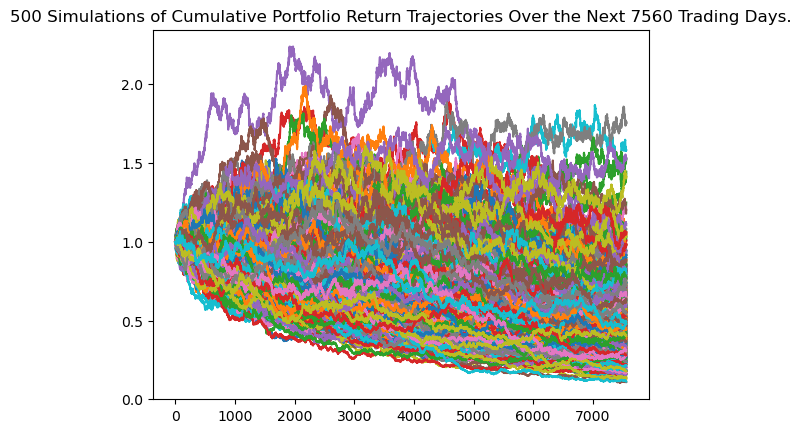

In [17]:
# Plot simulation outcomes
# YOUR CODE HERE!
plot = mc_sim.plot_simulation()

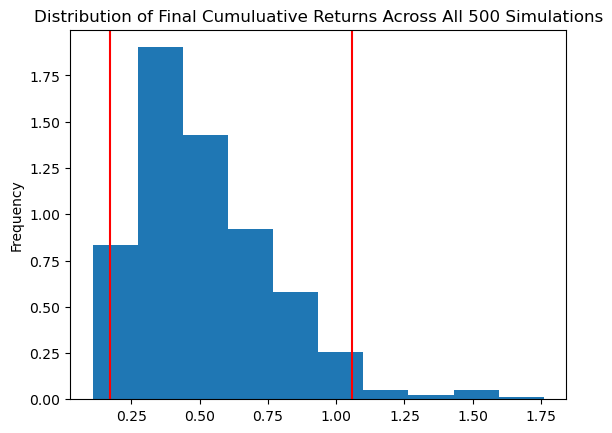

In [18]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist = mc_sim.plot_distribution()

### Retirement Analysis

In [19]:
metrics = mc_sim.simulated_return.iloc[-1].describe()

In [20]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
summary = mc_sim.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(summary)

count           500.000000
mean              0.521104
std               0.254100
min               0.109324
25%               0.332415
50%               0.467861
75%               0.665248
max               1.759890
95% CI Lower      0.172781
95% CI Upper      1.057678
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [21]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
lower = summary[8] * initial_investment
upper = summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower} and ${upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $3455.6229789235067 and $21153.56293905909


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [22]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
lower = summary[8] * initial_investment
upper = summary[9] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${lower} and ${upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $5183.43446838526 and $31730.344408588637


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001799,1.000245,1.006243,0.995742,1.003219,0.998395,0.997985,1.004253,1.002497,0.998947,...,1.007121,1.004291,1.000334,1.000876,0.998973,1.001375,0.996477,1.002103,1.005063,0.995521
2,0.998289,1.000243,1.004284,0.996554,1.004502,0.993317,0.996037,1.010316,1.000850,0.996382,...,1.007016,1.003709,0.999542,1.001450,1.004142,1.004022,0.996702,1.004359,1.009205,0.999000
3,1.002639,0.997279,1.008339,0.992870,0.998657,0.989041,0.994189,1.010062,0.999200,0.999132,...,1.004156,1.002288,1.003976,0.994908,1.008989,1.004545,0.995074,1.010488,1.011124,1.002626
4,1.008853,0.996292,1.002813,0.995244,0.996794,0.990576,0.999322,1.010897,0.989222,0.995257,...,1.000057,1.007349,1.006909,0.990823,1.013085,1.002427,0.996293,1.007081,1.010369,0.998654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.438618,0.926659,1.048662,1.101424,1.134443,1.200987,1.347489,1.257520,1.428939,1.194429,...,1.104654,1.273680,1.276718,1.297344,1.229379,1.295593,1.501864,1.198438,1.386161,1.426163
1257,1.441785,0.926428,1.048574,1.104941,1.137374,1.204559,1.360843,1.260661,1.429710,1.201055,...,1.107447,1.269262,1.265880,1.296800,1.227049,1.297884,1.510874,1.190802,1.388448,1.427391
1258,1.444675,0.931714,1.053040,1.110206,1.140592,1.199869,1.358605,1.254728,1.426409,1.207420,...,1.101690,1.274683,1.281527,1.303255,1.227517,1.294870,1.503567,1.191945,1.388434,1.441467
1259,1.443488,0.934065,1.049921,1.108998,1.142538,1.203844,1.363563,1.254192,1.425030,1.213366,...,1.103902,1.276629,1.275813,1.296929,1.222773,1.285521,1.498580,1.192940,1.397786,1.440244


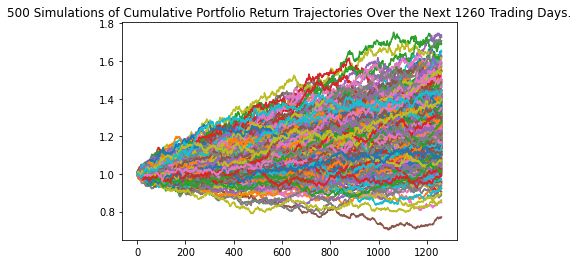

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

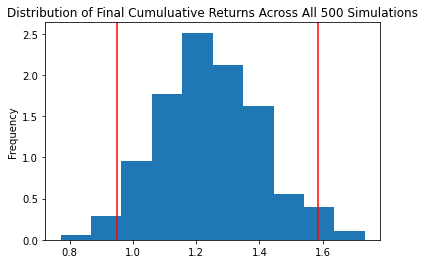

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.245905
std               0.160008
min               0.771559
25%               1.140795
50%               1.232555
75%               1.352284
max               1.733421
95% CI Lower      0.951523
95% CI Upper      1.586592
Name: 1260, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $57091.37 and $95195.55


### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004461,1.003269,0.998934,0.996767,1.000906,0.999279,0.995262,1.005752,0.993466,0.993655,...,1.001427,1.004350,0.996932,0.996844,0.997507,1.003457,0.998736,1.001195,0.999904,1.010218
2,1.007901,1.003304,0.993812,0.999973,1.000910,1.002347,0.996311,1.007234,0.993550,0.991021,...,0.997379,1.001952,0.998124,0.998063,1.001733,1.000273,0.994865,1.000109,0.994648,1.007838
3,1.007532,1.001077,0.990963,0.998339,1.001779,1.003653,0.994439,1.012230,0.999170,0.996484,...,0.995265,1.001745,0.995332,1.003023,1.003800,0.999755,0.997616,1.004730,0.993391,1.010444
4,1.020339,1.005743,0.991869,0.998218,1.005630,1.008717,0.987764,1.012750,0.999227,0.996474,...,0.999028,1.004730,0.995357,1.000204,1.008738,0.999273,0.999426,1.003776,0.991478,1.013379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.616922,1.761703,1.143430,1.687801,1.743826,1.174891,1.514199,2.447129,1.589765,1.570578,...,1.316494,1.863650,1.727959,1.411033,1.804671,1.500605,1.413278,1.552375,1.318340,1.960015
2517,1.620285,1.769184,1.145132,1.695693,1.742878,1.175745,1.517697,2.441471,1.586174,1.560826,...,1.318463,1.857860,1.724003,1.409092,1.810136,1.499466,1.413210,1.552539,1.316872,1.956776
2518,1.622141,1.771927,1.149019,1.691589,1.739420,1.178965,1.522624,2.444413,1.580680,1.566154,...,1.317147,1.864694,1.727503,1.419561,1.821212,1.492831,1.412283,1.556659,1.318842,1.961271
2519,1.628885,1.770207,1.149670,1.703935,1.738053,1.182429,1.519485,2.441360,1.565663,1.576607,...,1.307985,1.858986,1.728039,1.430017,1.814690,1.496851,1.409284,1.562660,1.324798,1.964190


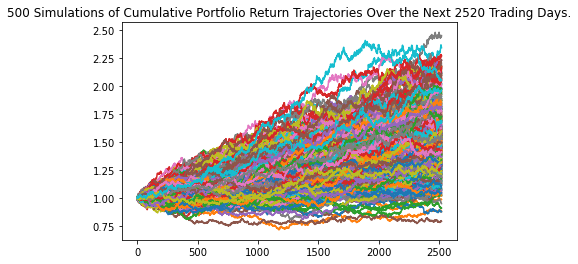

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

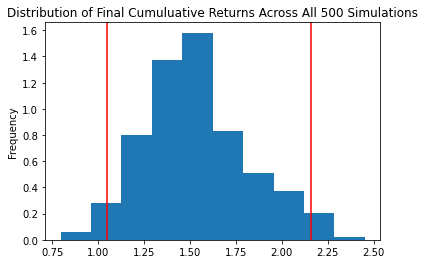

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

count           500.000000
mean              1.537014
std               0.282192
min               0.795263
25%               1.339641
50%               1.523799
75%               1.693927
max               2.451787
95% CI Lower      1.049781
95% CI Upper      2.159935
Name: 2520, dtype: float64


In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62986.85 and $129596.12
